In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# df_ph = pd.read_csv('Dataset/Ph.csv')
# df_kelembapan = pd.read_csv('Dataset/kelembapan.csv')
# df_hujan = pd.read_csv('/content/drive/MyDrive/Dataset/curah hujan baru.csv')
data = pd.read_csv('/content/drive/MyDrive/Dataset/coba.csv')
# df_temp = pd.read_csv('Dataset/suhu tanah.csv')
# df_jarak = pd.read_csv('Dataset/jarak tanaman.csv')

In [4]:
data.shape
#X= 59 -> input
#y= 6 -> fitur/parameter

(60, 6)

In [5]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton),curah hujan
0,2013,Januari,38111,15.00,90.30,343.70
1,2013,Februari,38111,1948.00,11767.87,201.10
2,2013,Maret,38111,24877.00,151724.82,262.80
3,2013,April,38111,5218.00,32095.92,197.20
4,2013,Mei,38111,671.00,3983.73,206.70
5,2013,Juni,38111,2591.00,59735.42,128.00
6,2013,Juli,38111,2874.00,63961.14,91.70
7,2013,Agustus,38111,974.00,17902.15,35.00
8,2013,September,38111,671.00,16069.38,0.00
9,2013,Oktober,38111,1581.00,9797.46,15.06


In [6]:
## Parameter/Fitur
# X = data[['Bulan','curah hujan', 'Luas Panen (ha)','Luas Lahan']]
# ## Target
# y = data['Produksi Padi (ton)']

## Ganti Bulan Ke angka

In [7]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [8]:
data['Bulan'] = data['Bulan'].map(month_mapping)

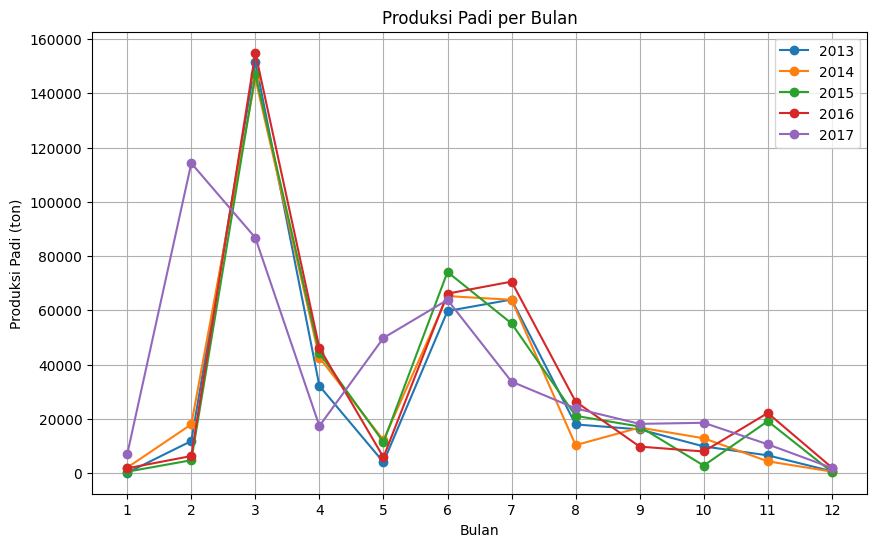

In [9]:
# Plotting time series untuk Produksi Padi
plt.figure(figsize=(10, 6))
for year in data['Tahun'].unique():
    data_year = data[data['Tahun'] == year]
    plt.plot(data_year['Bulan'], data_year['Produksi Padi (ton)'], marker='o', linestyle='-', label=str(year))

plt.title('Produksi Padi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Produksi Padi (ton)')
plt.grid(True)
plt.xticks(data['Bulan'].unique())  # Menampilkan label bulan
plt.legend()
plt.show()

In [10]:
# data = data.drop(columns='Tahun')

In [11]:
data.iloc[:,4]

0         90.30
1      11767.87
2     151724.82
3      32095.92
4       3983.73
5      59735.42
6      63961.14
7      17902.15
8      16069.38
9       9797.46
10      6504.30
11       630.50
12      1988.21
13     17925.11
14    145529.02
15     42535.52
16     12105.41
17     65237.10
18     63868.34
19     10263.98
20     16746.45
21     12801.26
22      4303.10
23       498.52
24       476.33
25      4698.00
26    147080.02
27     44206.87
28     11366.55
29     74117.47
30     55162.35
31     21069.22
32     17115.07
33      2714.40
34     19105.20
35       378.45
36      1726.20
37      6253.20
38    154993.60
39     46114.90
40      5805.30
41     66146.60
42     70568.90
43     26339.80
44      9721.80
45      7921.40
46     22110.10
47      2010.90
48      6963.00
49    114260.00
50     86737.00
51     17318.00
52     49808.00
53     63853.00
54     33696.00
55     23817.00
56     18106.00
57     18508.00
58     10568.00
59      1864.00
Name: Produksi Padi (ton), dtype: float6

In [12]:
data.shape

(60, 6)

In [13]:
data.dtypes

Tahun                    int64
Bulan                    int64
Luas Lahan               int64
Luas Panen (ha)        float64
Produksi Padi (ton)    float64
curah hujan            float64
dtype: object

In [14]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton),curah hujan
0,2013,1,38111,15.00,90.30,343.70
1,2013,2,38111,1948.00,11767.87,201.10
2,2013,3,38111,24877.00,151724.82,262.80
3,2013,4,38111,5218.00,32095.92,197.20
4,2013,5,38111,671.00,3983.73,206.70
5,2013,6,38111,2591.00,59735.42,128.00
6,2013,7,38111,2874.00,63961.14,91.70
7,2013,8,38111,974.00,17902.15,35.00
8,2013,9,38111,671.00,16069.38,0.00
9,2013,10,38111,1581.00,9797.46,15.06


# Split

In [15]:
test_split=round(len(data)*0.60)
data_training=data[:test_split]
data_testing=data[test_split:]
print(data_training.shape)
print(data_testing.shape)

(36, 6)
(24, 6)


## MinMax Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
data_training_scaled = scaler.fit_transform(data_training)
data_testing_scaled=scaler.transform(data_testing)
data_training_scaled, data_testing_scaled

(array([[0.        , 0.        , 0.86137072, 0.        , 0.        ,
         0.9197217 ],
        [0.        , 0.09090909, 0.86137072, 0.07774918, 0.07701129,
         0.53813219],
        [0.        , 0.18181818, 0.86137072, 1.        , 1.        ,
         0.70323789],
        [0.        , 0.27272727, 0.86137072, 0.2092752 , 0.2110708 ,
         0.52769601],
        [0.        , 0.36363636, 0.86137072, 0.02638565, 0.02567641,
         0.55311747],
        [0.        , 0.45454545, 0.86137072, 0.10361194, 0.3933479 ,
         0.34252074],
        [0.        , 0.54545455, 0.86137072, 0.11499477, 0.4212157 ,
         0.245384  ],
        [0.        , 0.63636364, 0.86137072, 0.03857292, 0.11746567,
         0.09365801],
        [0.        , 0.72727273, 0.86137072, 0.02638565, 0.10537891,
         0.        ],
        [0.        , 0.81818182, 0.86137072, 0.06298769, 0.06401682,
         0.04029971],
        [0.        , 0.90909091, 0.86137072, 0.03523449, 0.04229908,
         0.43296762],

In [17]:
data_training.shape, data_testing.shape

((36, 6), (24, 6))

In [18]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i, 4])
    return np.array(dataX),np.array(dataY)
X_train,y_train=createXY(data_training_scaled,1)
X_test,y_test=createXY(data_testing_scaled,1)
y_train,y_test

(array([0.07701129, 1.        , 0.2110708 , 0.02567641, 0.3933479 ,
        0.4212157 , 0.11746567, 0.10537891, 0.06401682, 0.04229908,
        0.00356251, 0.01251635, 0.11761708, 0.95913991, 0.27991792,
        0.0792373 , 0.4296304 , 0.4206037 , 0.06709343, 0.10984405,
        0.08382629, 0.02778259, 0.00269213, 0.00254579, 0.03038688,
        0.96936845, 0.29094015, 0.07436466, 0.48819471, 0.3631894 ,
        0.13835187, 0.11227503, 0.01730543, 0.12539955, 0.00190029]),
 array([0.04064312, 1.02155696, 0.30352323, 0.03768931, 0.43562838,
        0.46479258, 0.17311032, 0.06351786, 0.05164457, 0.14521627,
        0.01266598, 0.04532411, 0.75292684, 0.57141804, 0.11361331,
        0.32787851, 0.42050253, 0.22162302, 0.15647295, 0.11881002,
        0.12146113, 0.06909838, 0.0116972 ]))

In [19]:
print("trainX Shape-- ",X_train.shape)
print("trainY Shape-- ",y_train.shape)

trainX Shape--  (35, 1, 6)
trainY Shape--  (35,)


In [20]:
print("testX Shape-- ",X_test.shape)
print("testY Shape-- ",y_test.shape)

testX Shape--  (23, 1, 6)
testY Shape--  (23,)


In [21]:
print("trainX[0]-- \n",X_train[0])
print("trainY[0]-- ",y_train[0])

trainX[0]-- 
 [[0.         0.         0.86137072 0.         0.         0.9197217 ]]
trainY[0]--  0.07701129004134415


In [22]:
X_train.shape[1], X_test.shape[2], X_train.shape[0]

(1, 6, 35)

# LSTM

Epoch 1/30
6/6 [==============================] - 5s 136ms/step - loss: 0.1457 - val_loss: 0.1068
Epoch 2/30
6/6 [==============================] - 0s 13ms/step - loss: 0.1330 - val_loss: 0.0967
Epoch 3/30
6/6 [==============================] - 0s 14ms/step - loss: 0.1194 - val_loss: 0.0890
Epoch 4/30
6/6 [==============================] - 0s 14ms/step - loss: 0.1092 - val_loss: 0.0827
Epoch 5/30
6/6 [==============================] - 0s 15ms/step - loss: 0.1011 - val_loss: 0.0779
Epoch 6/30
6/6 [==============================] - 0s 14ms/step - loss: 0.0936 - val_loss: 0.0745
Epoch 7/30
6/6 [==============================] - 0s 15ms/step - loss: 0.0881 - val_loss: 0.0723
Epoch 8/30
6/6 [==============================] - 0s 17ms/step - loss: 0.0837 - val_loss: 0.0708
Epoch 9/30
6/6 [==============================] - 0s 15ms/step - loss: 0.0798 - val_loss: 0.0702
Epoch 10/30
6/6 [==============================] - 0s 14ms/step - loss: 0.0781 - val_loss: 0.0699
Epoch 11/30
6/6 [===========

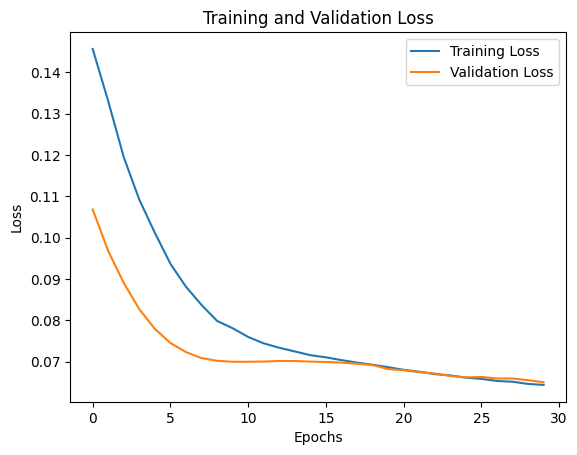

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1472      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1489 (5.82 KB)
Trainable params: 1489 (5.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
!pip install scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping


# model = Sequential()
# model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(8, return_sequences=False))
# model.add(Dense(16))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))
# model.compile(optimizer=AdamW(learning_rate=0.001), loss='mean_squared_error')
# # model.compile(loss=mean_squared_error, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
# history = model.fit(X_train, y_train, epochs=70, batch_size=6, validation_data=(X_test, y_test))
# # model.fit(X_train, y_train, epochs=250, batch_size=8, validation_data=(X_test, y_test))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()
# model.summary()

# baru
model = Sequential()
model.add(LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=30, batch_size=6, validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model.summary()

In [24]:
# import matplotlib.pyplot as plt

# history = model.fit(X_train, y_train, epochs=50, batch_size=6, validation_data=(X_test, y_test))

# # Plot loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [25]:
prediction = model.predict(X_test)
prediction

1/1 [==============================] - 0s 342ms/step


array([[0.36345983],
       [0.38132858],
       [0.39835197],
       [0.3580727 ],
       [0.3510744 ],
       [0.35266417],
       [0.341174  ],
       [0.29582888],
       [0.3257715 ],
       [0.3349827 ],
       [0.3013963 ],
       [0.29023677],
       [0.224044  ],
       [0.250458  ],
       [0.2451519 ],
       [0.21494506],
       [0.21156637],
       [0.20310834],
       [0.19624557],
       [0.2075889 ],
       [0.1454347 ],
       [0.14047402],
       [0.21276085]], dtype=float32)

In [26]:
prediction.shape

(23, 1)

In [27]:
# scaler.inverse_transform(prediction)
prediction_copies_array = np.repeat(prediction,6, axis=-1)
prediction_copies_array

array([[0.36345983, 0.36345983, 0.36345983, 0.36345983, 0.36345983,
        0.36345983],
       [0.38132858, 0.38132858, 0.38132858, 0.38132858, 0.38132858,
        0.38132858],
       [0.39835197, 0.39835197, 0.39835197, 0.39835197, 0.39835197,
        0.39835197],
       [0.3580727 , 0.3580727 , 0.3580727 , 0.3580727 , 0.3580727 ,
        0.3580727 ],
       [0.3510744 , 0.3510744 , 0.3510744 , 0.3510744 , 0.3510744 ,
        0.3510744 ],
       [0.35266417, 0.35266417, 0.35266417, 0.35266417, 0.35266417,
        0.35266417],
       [0.341174  , 0.341174  , 0.341174  , 0.341174  , 0.341174  ,
        0.341174  ],
       [0.29582888, 0.29582888, 0.29582888, 0.29582888, 0.29582888,
        0.29582888],
       [0.3257715 , 0.3257715 , 0.3257715 , 0.3257715 , 0.3257715 ,
        0.3257715 ],
       [0.3349827 , 0.3349827 , 0.3349827 , 0.3349827 , 0.3349827 ,
        0.3349827 ],
       [0.3013963 , 0.3013963 , 0.3013963 , 0.3013963 , 0.3013963 ,
        0.3013963 ],
       [0.29023677, 0

In [28]:
pred = scaler.inverse_transform(prediction_copies_array)[:, 4]

In [29]:
prediction_copies_array.shape

(23, 6)

In [30]:
label = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), 6, axis=-1))[:, 4]
label.shape

(23,)

# Residual Calc

In [31]:
residual = test_split - pred

In [32]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,label)
print("\nResidual " ,residual)

Pred Values--  [55203.355 57912.875 60494.21  54386.48  53325.297 53566.363 51824.055
 44948.17  49488.508 50885.24  45792.383 44100.215 34063.105 38068.38
 37263.793 32683.39  32171.064 30888.535 29847.902 31567.943 22143.223
 21391.01  32352.19 ]

Original Values--  [  6253.2 154993.6  46114.9   5805.3  66146.6  70568.9  26339.8   9721.8
   7921.4  22110.1   2010.9   6963.  114260.   86737.   17318.   49808.
  63853.   33696.   23817.   18106.   18508.   10568.    1864. ]

Residual  [-55167.355 -57876.875 -60458.21  -54350.48  -53289.297 -53530.363
 -51788.055 -44912.17  -49452.508 -50849.24  -45756.383 -44064.215
 -34027.105 -38032.38  -37227.793 -32647.39  -32135.064 -30852.535
 -29811.902 -31531.943 -22107.223 -21355.01  -32316.19 ]


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, pred)

mae = mean_absolute_error(y_test, pred)

mape = mean_absolute_percentage_error(y_test,pred)

r2 = r2_score(y_test, pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 1889339952.6399434
Mean Absolute Error (MAE): 41928.7828993638
Mean Absolute Error (MAPE): 637761.3551836621
r2 Score: -28980116461.701763


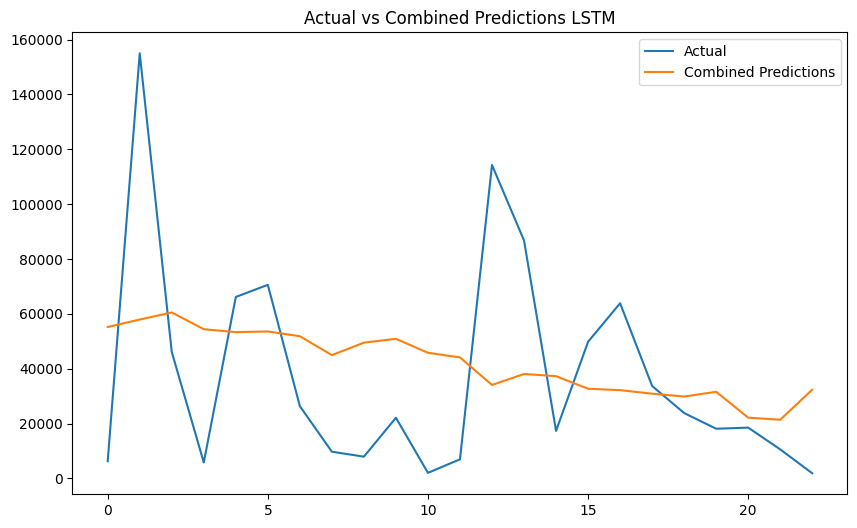

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(label, label='Actual')
plt.plot(pred, label='Combined Predictions')
plt.legend()
plt.title('Actual vs Combined Predictions LSTM')
plt.show()

In [35]:
residual.shape

(23,)

In [36]:
selected_feature = label
selected_feature,selected_feature.shape

(array([  6253.2, 154993.6,  46114.9,   5805.3,  66146.6,  70568.9,
         26339.8,   9721.8,   7921.4,  22110.1,   2010.9,   6963. ,
        114260. ,  86737. ,  17318. ,  49808. ,  63853. ,  33696. ,
         23817. ,  18106. ,  18508. ,  10568. ,   1864. ]),
 (23,))

In [37]:
# selected_feature_2d = selected_feature.reshape(-1, 1)
# selected_feature_2d

In [38]:
label_2d = label.reshape(-1, 1)
label_2d

array([[  6253.2],
       [154993.6],
       [ 46114.9],
       [  5805.3],
       [ 66146.6],
       [ 70568.9],
       [ 26339.8],
       [  9721.8],
       [  7921.4],
       [ 22110.1],
       [  2010.9],
       [  6963. ],
       [114260. ],
       [ 86737. ],
       [ 17318. ],
       [ 49808. ],
       [ 63853. ],
       [ 33696. ],
       [ 23817. ],
       [ 18106. ],
       [ 18508. ],
       [ 10568. ],
       [  1864. ]])

# SVM dengan Residue

In [39]:
svm_model = SVR(kernel='linear', verbose=True)
svm_model.fit(label_2d, residual)
svm_predictions = svm_model.predict(label_2d)
svm_predictions

[LibSVM]

array([-44101.40527542, -32509.35827655, -40994.79335102, -44136.31225294,
       -39433.62767253, -39088.97678629, -42535.96097392, -43831.08077471,
       -43971.39451291, -42865.60161801, -44432.02789707, -44046.08718408,
       -35683.92150725, -37828.91984022, -43239.07276953, -40706.97250212,
       -39612.37883414, -41962.65731085, -42732.57478083, -43177.66018141,
       -43146.33040846, -43765.13238323, -44443.47651309])

In [40]:
svm_predictions.shape

(23,)

In [41]:
pred.shape

(23,)

In [42]:
combined_predictions = pred + svm_predictions
combined_predictions

array([ 11101.95019333,  25403.51672345,  19499.41758648,  10250.16821581,
        13891.66920247,  14477.38649496,   9288.09371358,   1117.09110029,
         5517.11329959,   8019.63666324,   1360.35491543,     54.12765967,
        -1620.8160385 ,    239.45906603,  -5975.27980078,  -8023.58187712,
        -7441.31438101, -11074.1221546 , -12884.67243708, -11609.71682204,
       -21003.10775221, -22374.12261761, -12091.28705997])

In [43]:
combined_predictions.shape, label.shape

((23,), (23,))

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, combined_predictions)

mae = mean_absolute_error(y_test, combined_predictions)

mape = mean_absolute_percentage_error(y_test,combined_predictions)

r2 = r2_score(y_test, combined_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 152609848.46450606
Mean Absolute Error (MAE): 10187.693614278214
Mean Absolute Error (MAPE): 125953.55528361272
r2 Score: -2340844575.793581


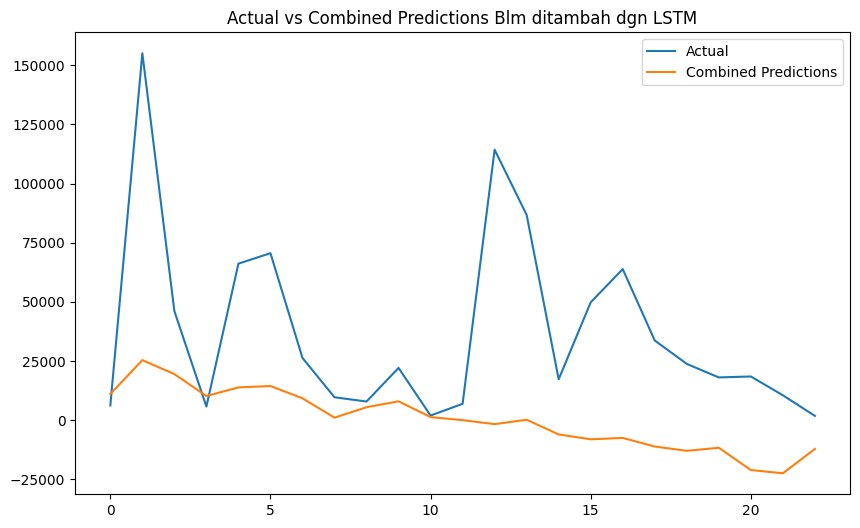

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(label_2d, label='Actual')
plt.plot(combined_predictions, label='Combined Predictions')
plt.legend()
plt.title('Actual vs Combined Predictions Blm ditambah dgn LSTM')
plt.show()

# FINAL

In [46]:
final = combined_predictions + pred
final

array([66305.30566208, 83316.39172345, 79993.62852398, 64636.64868456,
       67216.96607747, 68043.74977621, 61112.14840108, 46065.26297529,
       55005.62111209, 58904.87494449, 47152.73772793, 44154.34250342,
       32442.28943025, 38307.83797228, 31288.51316797, 24659.80874788,
       24729.75007211, 19814.41300165, 16963.22990667, 19958.22653734,
        1140.11490404,  -983.11285198, 20260.90239316])

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, final)

mae = mean_absolute_error(y_test, final)

mape = mean_absolute_percentage_error(y_test,final)

r2 = r2_score(y_test, final)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 2339025577.9864516
Mean Absolute Error (MAE): 42280.44932519685
Mean Absolute Error (MAPE): 603443.252665567
r2 Score: -35877732624.39147


## Plot Hasil Prediksi

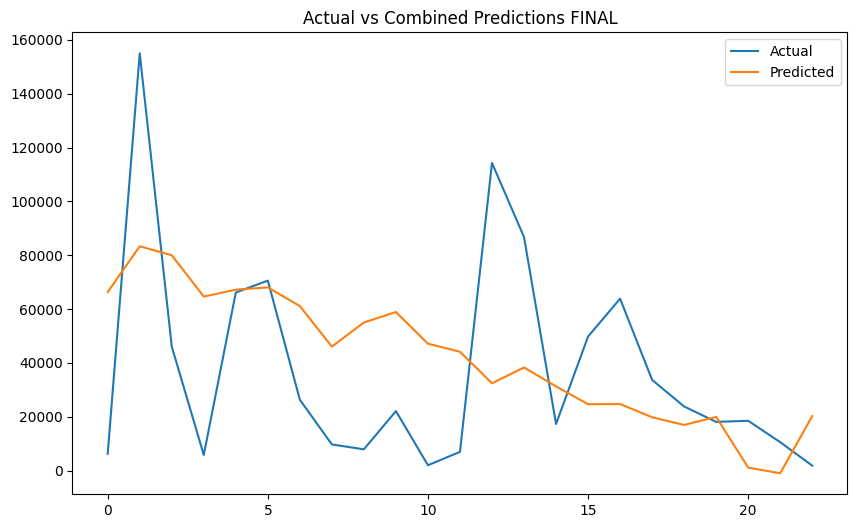

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(label_2d, label='Actual')
plt.plot(final, label='Predicted')
plt.legend()
plt.title('Actual vs Combined Predictions FINAL')
plt.show()

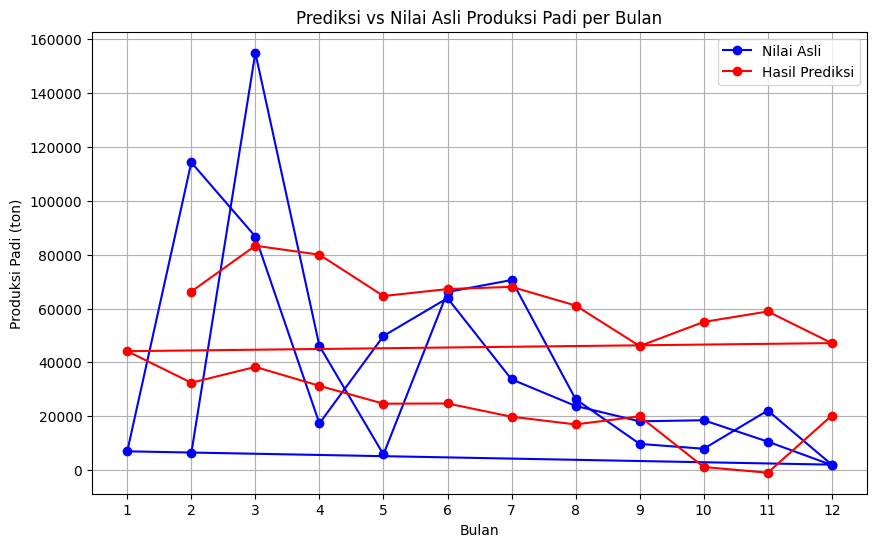

In [51]:


plt.figure(figsize=(10, 6))

# Plot nilai asli
plt.plot(data['Bulan'][-len(final):], label_2d[-len(final):], marker='o', linestyle='-', label='Nilai Asli', color='blue')

# Plot hasil prediksi
plt.plot(data['Bulan'][-len(final):], final, marker='o', linestyle='-', label='Hasil Prediksi', color='red')

plt.title('Prediksi vs Nilai Asli Produksi Padi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Produksi Padi (ton)')
plt.grid(True)
plt.xticks(data['Bulan'].unique())  # Menampilkan label bulan
plt.legend()
plt.show()

In [49]:
# plt.plot(label, color = 'red', label = 'Real')
# plt.plot(pred, color = 'blue', label = 'Predicted')
# plt.title('Prediction')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [50]:
data.iloc[:,4]

0         90.30
1      11767.87
2     151724.82
3      32095.92
4       3983.73
5      59735.42
6      63961.14
7      17902.15
8      16069.38
9       9797.46
10      6504.30
11       630.50
12      1988.21
13     17925.11
14    145529.02
15     42535.52
16     12105.41
17     65237.10
18     63868.34
19     10263.98
20     16746.45
21     12801.26
22      4303.10
23       498.52
24       476.33
25      4698.00
26    147080.02
27     44206.87
28     11366.55
29     74117.47
30     55162.35
31     21069.22
32     17115.07
33      2714.40
34     19105.20
35       378.45
36      1726.20
37      6253.20
38    154993.60
39     46114.90
40      5805.30
41     66146.60
42     70568.90
43     26339.80
44      9721.80
45      7921.40
46     22110.10
47      2010.90
48      6963.00
49    114260.00
50     86737.00
51     17318.00
52     49808.00
53     63853.00
54     33696.00
55     23817.00
56     18106.00
57     18508.00
58     10568.00
59      1864.00
Name: Produksi Padi (ton), dtype: float6